In [47]:
import pandas as pd
import numpy as np
#import pandas_profiling

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
import geopy.distance

In [155]:
X_train1=pd.read_csv('data/train_v2.csv', sep=';')
#X_train1=X_train1[X_train1.columns[1:27]]
X_train1.head(5)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,Dia_semana,Dia_semana_do,Dia_semana_ju,Dia_semana_lu,Dia_semana_ma,Dia_semana_mi,Dia_semana_sa,Dia_semana_vi,Dia_semana_ma.1,segmentos naturales
0,id2377394,1,12/06/2016,12/06/2016 0:54,1,-73.980.415,40.738.564,-73.999.481,40.731.152,N,...,do,1,0,0,0,0,0,0,0.020456,1
1,id3858529,2,19/01/2016,19/01/2016 12:10,1,-73.979.027,40.763.939,-74.005.333,40.710.087,N,...,ma,0,0,0,1,0,0,0,0.059934,1
2,id3504673,2,6/04/2016,6/04/2016 19:39,1,-74.010.040,40.719.971,-74.012.268,40.706.718,N,...,mi,0,0,0,0,1,0,0,0.013438,1
3,id2181028,2,26/03/2016,26/03/2016 13:38,1,-73.973.053,40.793.209,-73.972.923,40.782.520,N,...,sa,0,0,0,0,0,1,0,0.010690,2
4,id1187965,2,19/02/2016,19/02/2016 10:11,2,-73.962.982,40.756.680,-73.984.406,40.760.719,N,...,vi,0,0,0,0,0,0,1,0.021801,1


In [165]:
feature_cols = ['Dia_semana_do', 'Dia_semana_ju', 'Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi','Dia_semana_sa','Dia_semana_vi','Dia_semana_ma.1']
X_train3 = X_train1[feature_cols]
y_train3 = X_train1.trip_duration

In [160]:
X_test1=pd.read_csv('data/test_v2.csv', sep=';')
X_test1.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,Dia_semana,Dia_semana_do,Dia_semana_ju,Dia_semana_lu,Dia_semana_ma,Dia_semana_mi,Dia_semana_sa,Dia_semana_vi,Dia_semana_ma.1,segmentos naturales
0,id1301050,1,27/05/2016,27/05/2016 23:16,1,-73.999.481,40.738.400,-73.985.786,40.732.815,N,...,vi,0,0,0,0,0,0,1,0.014790,1
1,id2900608,2,27/05/2016,27/05/2016 1:07,1,-73.992.195,40.727.226,-73.974.655,40.783.070,N,...,vi,0,0,0,0,0,0,1,0.058533,1
2,id3587298,1,27/02/2016,27/02/2016 22:14,1,-73.983.765,40.749.874,-73.958.832,40.800.961,N,...,sa,0,0,0,0,0,1,0,0.056846,2
3,id3361153,1,11/03/2016,11/03/2016 7:20,1,-73.994.560,40.750.526,-73.978.500,40.756.191,N,...,vi,0,0,0,0,0,0,1,0.017030,1
4,id2569332,1,13/04/2016,13/04/2016 14:30,1,-73.968.727,40.786.438,-73.960.495,40.778.152,N,...,mi,0,0,0,0,1,0,0,0.011680,1


In [166]:
feature_cols = ['Dia_semana_do', 'Dia_semana_ju', 'Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi','Dia_semana_sa','Dia_semana_vi','Dia_semana_ma.1']
X_test3 = X_test1[feature_cols]
y_test3 = X_test1.trip_duration

In [136]:
X_train1.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
Dia_semana             0
Dia_semana_do          0
Dia_semana_ju          0
Dia_semana_lu          0
Dia_semana_ma          0
Dia_semana_mi          0
Dia_semana_sa          0
Dia_semana_vi          0
Dia_semana_ma.1        0
segmentos naturales    0
dtype: int64

In [121]:
import os
import time
import numpy as np
#import cPickle as pickle
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cross_validation import ShuffleSplit

In [218]:
#Gradiente boosting regresor
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
clf = GradientBoostingRegressor(n_estimators=500, max_depth=2, random_state=50)
clf.fit(X_train3, y_train3)
print('MSE', metrics.mean_squared_error(y_test3, clf.predict(X_test3)))
print('MAE', metrics.mean_absolute_error(y_test3, clf.predict(X_test3)))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test3, clf.predict(X_test3))))


MSE 178950.46449240876
MAE 261.18624013432066
RMSE 423.025370979577


Training scores:

 [[     -0.              -0.              -0.              -0.
       -0.              -0.              -0.              -0.
       -0.              -0.        ]
 [ -14733.6730254   -17692.66382508  -17692.66382508  -17692.66382508
   -17692.66382508  -17692.66382508  -17692.66382508  -17692.66382508
   -17692.66382508  -17692.66382508]
 [ -80793.13457123  -70212.48566638  -70212.48566638  -70212.48566638
   -70212.48566638  -70212.48566638  -70212.48566638  -70212.48566638
   -70212.48566638  -70212.48566638]
 [-114075.84224393 -108463.42295519 -108463.42295519 -108463.42295519
  -108463.42295519 -108463.42295519 -108463.42295519 -108463.42295519
  -108463.42295519 -108463.42295519]
 [-128195.47339178 -130104.89600051 -130104.89600051 -130104.89600051
  -130104.89600051 -130104.89600051 -130104.89600051 -130104.89600051
  -130104.89600051 -130104.89600051]
 [-126888.46978763 -141190.04978403 -141190.04978403 -141190.04978403
  -141190.04978403 -141190.04978403 -14119

(0, 500000)

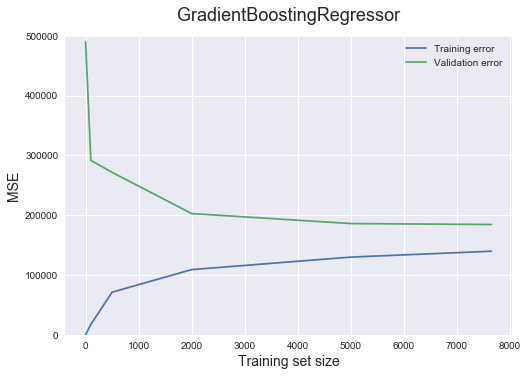

In [240]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]
features = ['Dia_semana_do', 'Dia_semana_ju', 'Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi','Dia_semana_sa','Dia_semana_vi','Dia_semana_ma.1']
from sklearn.model_selection import learning_curve
target = 'trip_duration'
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = GradientBoostingRegressor(), X = X_train1[features],
                                                   y = X_train1[target], train_sizes = train_sizes, cv = 10,
                                                   scoring = 'neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('GradientBoostingRegressor', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,500000)

In [229]:
#gradiente conkfols
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
#kf = KFold(25, n_folds=5, shuffle=False)
#results = cross_val_score(clf, X_train3, y_train3, cv=10, scoring='MSE')

max_depth_range = range(1, 5)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

for depth in max_depth_range:
    clf = GradientBoostingRegressor(n_estimators=60, max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(clf,X_train3, y_train3, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [181]:
 #random forest
clf2 = RandomForestRegressor(n_estimators=50, n_jobs=4, random_state=23)
clf2.fit(X_train3, y_train3)
print('MSE', metrics.mean_squared_error(y_test3, clf2.predict(X_test3)))
print('MAE', metrics.mean_absolute_error(y_test3, clf2.predict(X_test3)))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test3, clf2.predict(X_test3))))
        

MSE 258658.30043554358
MAE 308.03623851473986
RMSE 508.58460499266346


In [198]:
#ridge
clf3= Ridge(alpha=2.3, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=None, solver='auto', tol=0.01)
clf3.fit(X_train3, y_train3)
print('MSE', metrics.mean_squared_error(y_test3, clf3.predict(X_test3)))
print('MAE', metrics.mean_absolute_error(y_test3, clf3.predict(X_test3)))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test3, clf3.predict(X_test3))))

MSE 197839.50890813896
MAE 288.32421729916524
RMSE 444.7915342136572


Training scores:

 [[     -0.              -0.              -0.              -0.
       -0.              -0.              -0.              -0.
       -0.              -0.        ]
 [-282978.66511248 -294177.25085641 -294177.25085641 -294177.25085641
  -294177.25085641 -294177.25085641 -294177.25085641 -294177.25085641
  -294177.25085641 -294177.25085641]
 [-300447.23830189 -277480.37646293 -277480.37646293 -277480.37646293
  -277480.37646293 -277480.37646293 -277480.37646293 -277480.37646293
  -277480.37646293 -277480.37646293]
 [-202665.73537124 -194439.8853924  -194439.8853924  -194439.8853924
  -194439.8853924  -194439.8853924  -194439.8853924  -194439.8853924
  -194439.8853924  -194439.8853924 ]
 [-176457.56305303 -179392.43073025 -179392.43073025 -179392.43073025
  -179392.43073025 -179392.43073025 -179392.43073025 -179392.43073025
  -179392.43073025 -179392.43073025]
 [-166687.99728269 -186695.13428429 -186695.13428429 -186695.13428429
  -186695.13428429 -186695.13428429 -186695.

(0, 500000)

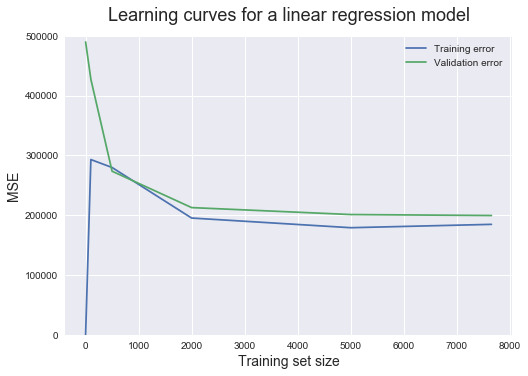

In [238]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]
features = ['Dia_semana_do', 'Dia_semana_ju', 'Dia_semana_lu', 'Dia_semana_ma', 'Dia_semana_mi','Dia_semana_sa','Dia_semana_vi','Dia_semana_ma.1']
from sklearn.model_selection import learning_curve
target = 'trip_duration'
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = Ridge(), X = X_train1[features],
                                                   y = X_train1[target], train_sizes = train_sizes, cv = 10,
                                                   scoring = 'neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,500000)

In [ ]:
De lo anterior se puede conclui que el mejor modelo que se ajusta a los datos es el gradiente boosting regresor, ya que
presenta un error de aproximadamente 7 minutos